In [19]:
import numpy as np

import sklearn as sk
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler

In [20]:
titanic_df=pd.read_csv('titanic.csv')

In [21]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
titanic_df=titanic_df.map(lambda x: x.lower() if isinstance(x, str) else x)

In [23]:
cor_df=titanic_df.copy()
cor_df
cor_df['Name']=cor_df['Name'].astype('category').cat.codes
cor_df['Sex']=cor_df['Sex'].astype('category').cat.codes
cor_df['Cabin']=cor_df['Cabin'].astype('category').cat.codes
cor_df['Ticket']=cor_df['Ticket'].astype('category').cat.codes
cor_df['Embarked']=cor_df['Embarked'].astype('category').cat.codes
correlation=cor_df.corr()
correlation

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.035434,0.042939,0.036847,-0.057527,-0.001652,-0.056560,0.012658,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.060116,-0.543351,-0.077221,-0.035322,0.081629,-0.164610,0.257307,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.046366,0.131900,-0.369226,0.083081,0.018443,0.319916,-0.549500,-0.537419,0.173511
Name,-0.035434,-0.060116,0.046366,1.000000,0.017492,0.064807,-0.016933,-0.044263,0.044767,-0.045194,0.008656,-0.010879
Sex,0.042939,-0.543351,0.131900,0.017492,1.000000,0.093254,-0.114631,-0.245489,0.059441,-0.182333,-0.137704,0.118492
Age,0.036847,-0.077221,-0.369226,0.064807,0.093254,1.000000,-0.308247,-0.189119,-0.075859,0.096067,0.167432,-0.044830
SibSp,-0.057527,-0.035322,0.083081,-0.016933,-0.114631,-0.308247,1.000000,0.414838,0.079433,0.159651,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.044263,-0.245489,-0.189119,0.414838,1.000000,0.019823,0.216225,0.033585,0.043351
Ticket,-0.056560,-0.164610,0.319916,0.044767,0.059441,-0.075859,0.079433,0.019823,1.000000,-0.013909,-0.176517,0.011254
Fare,0.012658,0.257307,-0.549500,-0.045194,-0.182333,0.096067,0.159651,0.216225,-0.013909,1.000000,0.310987,-0.230365


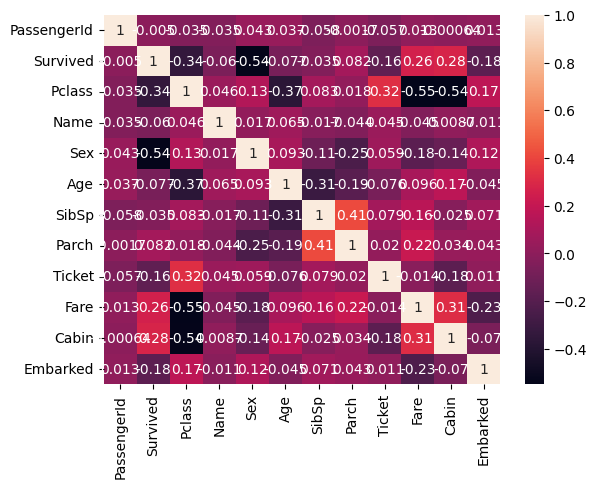

In [24]:
sns.heatmap(correlation, annot=True)
plt.show()

In [25]:
X = cor_df[['Sex', 'Pclass']]
y = cor_df['Survived']

The reason I chose to look at Sex and Pclass are because they are the two variables which seem most related(going off highest absolute values on correlation chart) to Survived(which is what we are trying to find) while also not being very closely related to each other. It is also important to use logistic regression opposed to linear as we are testing with more than one variable.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=32,stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
regression = LogisticRegression(random_state=32).fit(X_train, y_train)
regression.fit(X_train, y_train)

LogisticRegression(random_state=32)

In [28]:
accuracy_score = regression.score(X_test, y_test)
print('accuracy: ', accuracy_score)

accuracy:  0.7798507462686567
